In [ ]:
# Under sampling on detail.csv

In [101]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Rest", "CCCV_Chg","CCCV_Dchg"]

In [102]:
data = pd.read_csv('C:/Users/Impana/Desktop/Documents/nunam/detail.csv',sep=',')
data.head()

,Record Index,Status,JumpTo,Cycle,Step,Cur(mA),Voltage(V),CapaCity(mAh),Energy(mWh),Relative Time(h:min:s.ms),Absolute Time
0,1,Rest,1,1,1,0.0,3.59,0.0,0.0,0:00:00.000,10-10-2020 20:03:39
1,2,Rest,1,1,1,0.0,3.59,0.0,0.0,0:00:01.000,10-10-2020 20:03:40
2,3,Rest,1,1,1,0.0,3.59,0.0,0.0,0:00:02.000,10-10-2020 20:03:41
3,4,Rest,1,1,1,0.0,3.59,0.0,0.0,0:00:03.000,10-10-2020 20:03:42
4,5,Rest,1,1,1,0.0,3.59,0.0,0.0,0:00:04.000,10-10-2020 20:03:43


In [ ]:
# dependent variable -- status-- unique value -- rest and CCCv_chg and CCCV_Dhg

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416682 entries, 0 to 416681
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Record Index               416682 non-null  int64  
 1   Status                     416682 non-null  object 
 2   JumpTo                     416682 non-null  int64  
 3   Cycle                      416682 non-null  int64  
 4   Step                       416682 non-null  int64  
 5   Cur(mA)                    416682 non-null  float64
 6   Voltage(V)                 416682 non-null  float64
 7   CapaCity(mAh)              416682 non-null  float64
 8   Energy(mWh)                416682 non-null  float64
 9   Relative Time(h:min:s.ms)  416682 non-null  object 
 10  Absolute Time              416682 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 35.0+ MB


In [104]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Status"]]
# Store the variable we are predicting 
target = "Status"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(416682, 10)
(416682,)


In [ ]:
# Exploratory analysis

In [105]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

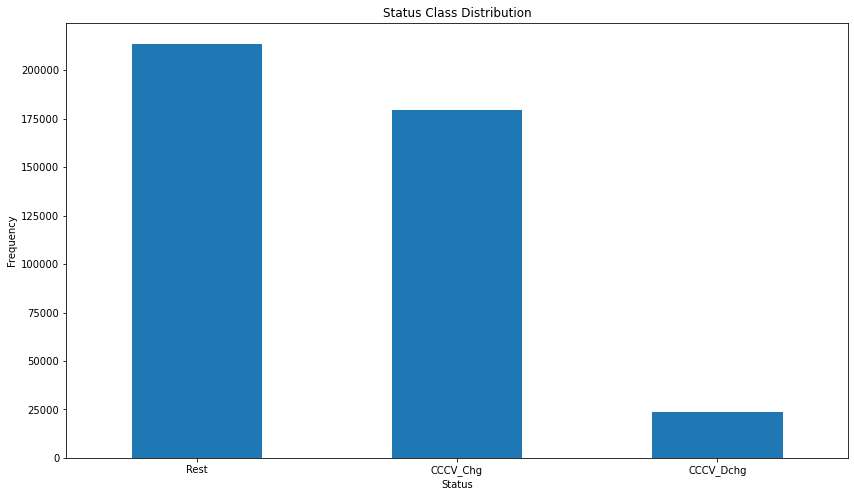

In [106]:
count_classes = pd.value_counts(data['Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Status Class Distribution")
plt.xticks(range(3), LABELS)
plt.xlabel("Status")
plt.ylabel("Frequency")

In [107]:
## Get the rest, CCCV_chg and CCCV_DChg dataset 

Rest = data[data['Status']=="Rest"]

CCCV_Chg = data[data['Status']=="CCCV_Chg"]

CCCV_DChg = data[data['Status']=="CCCV_DChg"]

In [108]:
print(Rest.shape, CCCV_Chg.shape, CCCV_DChg.shape)
# 1st highest--CCCV_Chg,
# 2nd highest -- CCCV_CDhg,
# last -- Rest

(23449, 11) (213706, 11) (179527, 11)


In [136]:
from imblearn.under_sampling import NearMiss

In [150]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(RANDOM_SEED)
X_res,Y_res=nm.fit_sample(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=42 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


ValueError: could not convert string to float: '0:00:00.000'

In [143]:
X_res.shape,y_res.shape


NameError: name 'X_res' is not defined

In [126]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'CCCV_Chg': 213706, 'CCCV_DChg': 179527, 'Rest': 23449})


NameError: name 'y_res' is not defined

In [146]:
data.to_csv("detailDownSampled.csv")#exporting the down sampled file.